### Import lib

In [32]:
import os
os.chdir("/cerea_raid/users/dumontj/dev/coco2/dl")
import numpy as np
import sys
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
import matplotlib.pyplot as plt
import models.reg as rg 

### Loss functions

### Data generation

In [64]:
# general param
N_img = 10_000
Ny = 32
Nx = 32
y, x = np.indices((Ny,Nx))

# data
magni = np.random.uniform(0.2, 3, N_img).reshape(1,1,-1)
center_Y = np.random.uniform(0,Ny, N_img).reshape(1,1,-1)
center_X = np.random.uniform(0,Nx, N_img).reshape(1,1,-1)
var_Y = np.random.uniform(0,20, N_img).reshape(1,1,-1)
var_X = np.random.uniform(0,20, N_img).reshape(1,1,-1)

data = magni * np.exp(-0.5*((np.expand_dims(x, axis=-1)-center_X)**2/var_X 
                            + (np.expand_dims(y, axis=-1)-center_Y)**2/var_Y))
data = np.where(data>0, data, 0)
# noise
noise = np.random.normal(0, 0.01, size=(N_img, Ny,Nx))


# datasets
data = np.transpose(data, (2,0,1))
data_X = (data + noise).reshape(N_img,Ny,Nx,1).astype(np.float32)
data_X = np.where(data_X>0, data_X, 0)

N_classes = 2
data_Y = np.exp(np.squeeze(magni).reshape(-1,1)) 
#data_Y = data_Y + np.random.normal(0, 0.1, size=(N_img,1))*data_Y
data_Y = np.tile(data_Y, (1, N_classes))
data_Y = np.log(data_Y)
data_Y = data_Y / np.max(data_Y)

ratio_train = 0.8
train_X = data_X[:int(ratio_train*N_img)]
train_Y = data_Y[:int(ratio_train*N_img)]
test_X = data_X[int(ratio_train*N_img):]
test_Y = data_Y[int(ratio_train*N_img):]


### Model def

In [65]:
#model = rg.standard_CNN(2, (Ny, Nx, 1))
model = rg.classic_CNN("EfficientNetB0", 2, (Ny, Nx, 1), "random")
model.compile("adam", loss=tf.keras.losses.MeanAbsoluteError())
#model.compile("adam", loss=my_mse)

### Training

In [66]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 1)]       0         
                                                                 
 efficientnetb0 (Functional)  (None, 1, 1, 1280)       4048991   
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 output_layer (Dense)        (None, 2)                 2562      
                                                                 
 activation_layer (Activatio  (None, 2)                0         
 n)                                                              
                                                                 
Total params: 4,051,553
Trainable params: 4,009,534
Non-tra

In [67]:
model.fit(x=train_X, y=train_Y, epochs=50, validation_data=(test_X, test_Y))

Epoch 1/50
250/250 [==============================] - 17s 46ms/step - loss: 0.3162 - val_loss: 0.2302
Epoch 2/50
250/250 [==============================] - 10s 41ms/step - loss: 0.1419 - val_loss: 0.2644
Epoch 3/50
250/250 [==============================] - 9s 38ms/step - loss: 0.1233 - val_loss: 0.2278
Epoch 4/50
250/250 [==============================] - 10s 42ms/step - loss: 0.1311 - val_loss: 0.2093
Epoch 5/50
250/250 [==============================] - 11s 44ms/step - loss: 0.1172 - val_loss: 0.0833
Epoch 6/50
250/250 [==============================] - 11s 44ms/step - loss: 0.1086 - val_loss: 0.3705
Epoch 7/50
250/250 [==============================] - 11s 42ms/step - loss: 0.1072 - val_loss: 0.2877
Epoch 8/50
250/250 [==============================] - 10s 42ms/step - loss: 0.0953 - val_loss: 0.3760
Epoch 9/50
250/250 [==============================] - 11s 44ms/step - loss: 0.0953 - val_loss: 0.0838
Epoch 10/50
250/250 [==============================] - 10s 39ms/step - loss: 0.0896

### Evaluation

[0.48692225 0.48692225]
tf.Tensor([[0.3214987  0.32310516]], shape=(1, 2), dtype=float32)


Text(0.5, 1.0, 'image')

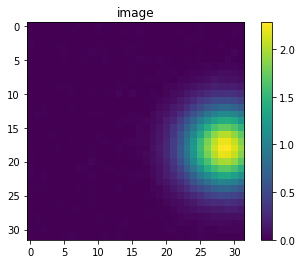

In [36]:
idx = int(np.random.uniform(0,N_img*0.2))

print(np.squeeze(test_Y[idx]))

print(model(tf.expand_dims(test_X[idx], 0)))

plt.figure()
plt.imshow(np.squeeze(test_X[idx]))
plt.colorbar()
plt.title("image")

In [37]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 dropout_18 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                          